In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector
import dask_awkward as dak

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [2]:
#sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import HNL_Processor


In [3]:
importlib.reload(MuonSystemReader)
importlib.reload(HNL_Processor)

<module 'HNL_Processor' from '/uscms/home/amalbert/nobackup/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/python/HNL_Plotting_HelperFunctions/HNL_Processor.py'>

In [4]:
HNL_2GeV_10ctau_path = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/signal_promptHNL/HNL_tau_mN_2_ctau_1000/normalized/HNL_tau_mN_2_ctau_1000.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

In [5]:
signal_events.fields

['runNum',
 'MC_condition',
 'lumiSec',
 'evtNum',
 'mH',
 'mX',
 'ctau',
 'HLT_CSCCSC',
 'HLT_CSCDT',
 'HLT_CscCluster100_PNetTauhPFJet10_Loose',
 'HLT_CscCluster100_Ele5',
 'HLT_CscCluster100_Mu5',
 'HLT_CscCluster50_Photon30Unseeded',
 'HLT_CscCluster50_Photon20Unseeded',
 'HLT_PFMET120_PFMHT120_IDTight',
 'jetVeto',
 'npv',
 'npu',
 'weight',
 'pileupWeight',
 'pileupWeightUp',
 'pileupWeightDown',
 'Flag_eeBadScFilter',
 'Flag_BadPFMuonFilter',
 'Flag_hfNoisyHitsFilter',
 'Flag_BadPFMuonDzFilter',
 'Flag_globalSuperTightHalo2016Filter',
 'Flag_EcalDeadCellTriggerPrimitiveFilter',
 'Flag_goodVertices',
 'Flag_all',
 'Flag_ecalBadCalibFilter',
 'LHEScaleWeight',
 'MetTriggerEffDown',
 'MetTriggerEffUp',
 'MetTriggerEff',
 'rho',
 'met',
 'metPhi',
 'Puppimet',
 'PuppimetPhi',
 'PuppimetJESUp',
 'PuppimetPhiJESUp',
 'PuppimetJESDown',
 'PuppimetPhiJESDown',
 'metJESUp',
 'metJESDown',
 'metPhiJESUp',
 'metPhiJESDown',
 'gHiggsPt',
 'gHiggsE',
 'gHiggsEta',
 'gHiggsPhi',
 'nCscRings',

In [6]:
data_path_base = "root://cmseos.fnal.gov//store/group/lpclonglived/amalbert/HNL_Tau_Search/2024_Data/"

data_samples = ["Muon0-Run2024B-PromptReco-v1",
    "Muon0-Run2024C-PromptReco-v1",
    "Muon0-Run2024D-PromptReco-v1",
    "Muon0-Run2024E-PromptReco-v1",
     "Muon0-Run2024E-PromptReco-v2",
    "Muon0-Run2024F-PromptReco-v1",
    "Muon0-Run2024G-PromptReco-v1",
    "Muon0-Run2024H-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v1",
    "Muon0-Run2024I-PromptReco-v2",
    "Muon1-Run2024B-PromptReco-v1",
    "Muon1-Run2024C-PromptReco-v1",
    "Muon1-Run2024D-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v1",
    "Muon1-Run2024E-PromptReco-v2",
    "Muon1-Run2024F-PromptReco-v1",
    "Muon1-Run2024G-PromptReco-v1",
    "Muon1-Run2024H-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v1",
    "Muon1-Run2024I-PromptReco-v2"
    ]

data_events_list = [data_path_base+sample+"/normalized/"+sample+"_goodLumi.root" for sample in data_samples]
data_events  = MuonSystemReader.loadTree_nanoFactory(data_events_list)


In [7]:
processor_data = HNL_Processor.HNL_Processor()
output_data = processor_data.process(data_events)

In [5]:
processor = HNL_Processor.HNL_Processor()
output = processor.process(signal_events)

Text(0.5, 1.0, 'Tau VVV Loose ID Distribution')

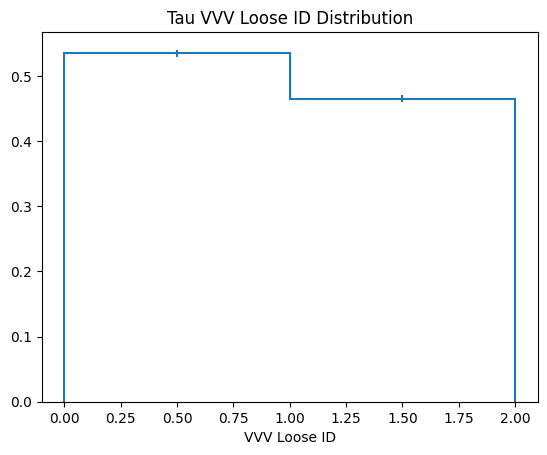

In [10]:
h = output['tau_vvvlooseID']
h.plot(density=True)
plt.title(h.metadata['title'])

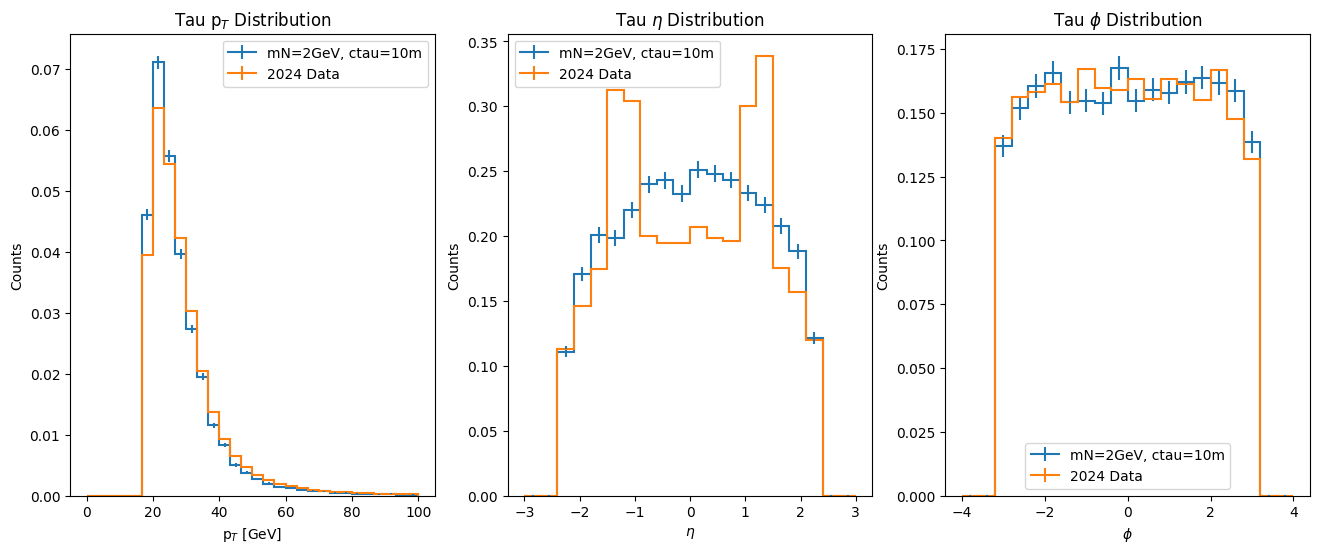

In [9]:
fig, axs = plt.subplots(1,3, figsize=(16,6))
signal_label = "mN=2GeV, ctau=10m"
data_label = "2024 Data"

#pT
h_pT = output["tau_pt"]
h_pT_data = output_data["tau_pt"]
h_pT.plot(ax=axs[0], label=signal_label, density=True)
h_pT_data.plot(ax=axs[0], label=data_label, density=True)
axs[0].set_title(h_pT.metadata["title"])
axs[0].set_ylabel(h_pT.metadata["y_label"])
axs[0].legend()

#eta
h_eta = output["tau_eta"]
h_eta_data = output_data["tau_eta"]
h_eta.plot(ax=axs[1], label=signal_label, density=True)
h_eta_data.plot(ax=axs[1], label=data_label, density=True)
axs[1].set_title(h_eta.metadata["title"])
axs[1].set_ylabel(h_eta.metadata["y_label"])
axs[1].legend()

#phi
h_phi = output["tau_phi"]
h_phi_data = output_data["tau_phi"]
h_phi.plot(ax=axs[2], label=signal_label, density=True)
h_phi_data.plot(ax=axs[2], label=data_label, density=True)
axs[2].set_title(h_phi.metadata["title"])
axs[2].set_ylabel(h_phi.metadata["y_label"])
axs[2].legend()


plt.show()

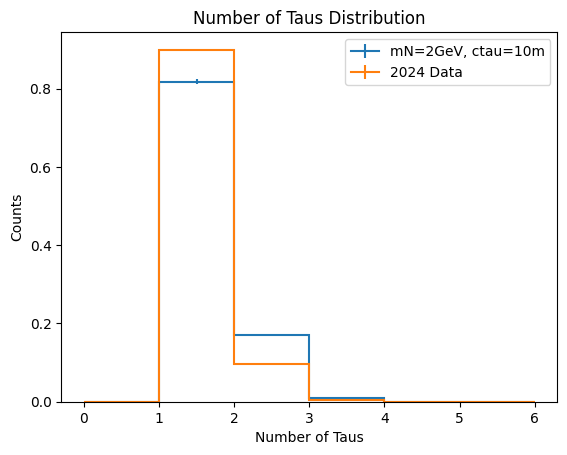

In [10]:
h = output["Num_Taus"]
h.plot(label = signal_label, density=True)
h_data = output_data["Num_Taus"]
h_data.plot(label = data_label, density=True)
plt.title(h.metadata["title"])
plt.ylabel(h.metadata["y_label"])
plt.legend()
plt.show()

19426.0
19426.0
19426.0
19426.0
19426.0
19426.0
19426.0
19426.0
8218103.0
8218103.0
8218103.0
8218103.0
8218103.0
8218103.0
8218103.0
8218103.0


Text(0.5, 1.0, 'Fraction of Taus Passing Each ID WP')

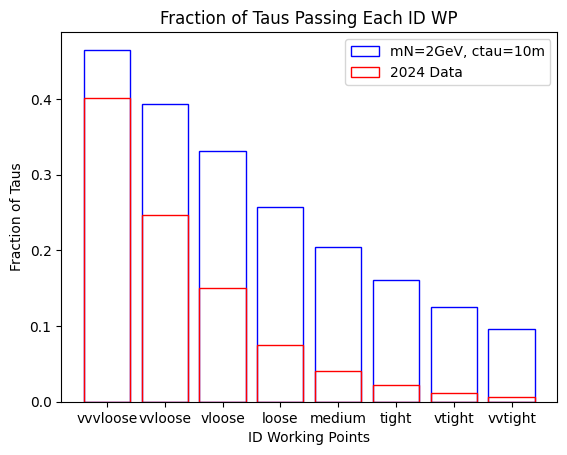

In [13]:
#make bar chart with fraction of taus passing each ID working point
fraction_passing = {}
categories = ['vvvloose', 'vvloose', 'vloose', 'loose', 'medium', 'tight', 'vtight', 'vvtight']
for hist_name in list(output.keys()):
    if "tau" and "ID" in hist_name:
        counts = output[hist_name].counts()
        fraction_passing[hist_name] = counts[1]/(counts[0]+counts[1])
        print((counts[0]+counts[1]))

fraction_passing_data = {}
for hist_name in list(output_data.keys()):
    if "tau" and "ID" in hist_name:
        counts = output_data[hist_name].counts()
        fraction_passing_data[hist_name] = counts[1]/(counts[0]+counts[1])
        print((counts[0]+counts[1]))

plt.bar(categories,list(fraction_passing.values()), facecolor='none', edgecolor='blue', label=signal_label)
plt.bar(categories,list(fraction_passing_data.values()), facecolor='none', edgecolor='red', label=data_label)
plt.legend()
plt.xlabel("ID Working Points")
plt.ylabel("Fraction of Taus")
plt.title("Fraction of Taus Passing Each ID WP")

In [4]:
HNL_2GeV_10ctau_path = "/uscms/home/amalbert/nobackup/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/promptHNL_testTauKinematics_taugen.root"
signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)

In [9]:
signal_events.gParticleId.compute()

<Array [[15, 9900012], [...], ..., [-15, ...]] type='240 * [var * int32[par...'>

In [21]:
signal_masked = (signal_events.nTaus.compute()==1)
signal_masked = signal_events[signal_masked]
genMask = (signal_masked.gParticleId==15) | (signal_masked.gParticleId==-15)

In [19]:
signal_masked.gParticleEta[(signal_masked.gParticleId==15) | (signal_masked.gParticleId==-15)].compute()

<Array [[-1.8], [1.64], ..., [-1], [2.05]] type='196 * var * float32[parame...'>

Text(0.5, 1.0, 'Delta eta between Gen and Reco Tau')

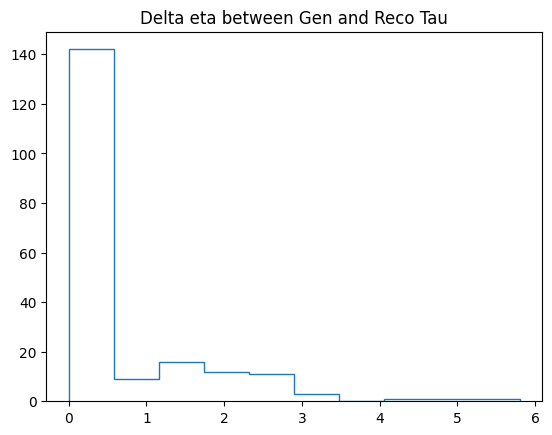

In [30]:

deltaEta = ak.flatten(signal_masked.gParticleEta[genMask])-ak.flatten(signal_masked.tauEta)
plt.hist(np.abs(deltaEta.compute()), density=False, histtype='step', label="signal")
plt.title("Delta eta between Gen and Reco Tau")

In [25]:
def deltaPhi(phi1, phi2):
    dphi = phi1 - phi2
    while (dphi > np.pi):
        dphi -= 2*np.pi
    while (dphi <= -np.pi):
        dphi += 2*np.pi
    return dphi


(array([15.,  8.,  3.,  5., 44., 91.,  4.,  6.,  3., 17.]),
 array([-3.137146  , -2.51174316, -1.88634033, -1.2609375 , -0.63553467,
        -0.01013184,  0.615271  ,  1.24067383,  1.86607666,  2.49147949,
         3.11688232]),
 [<matplotlib.patches.Polygon at 0x7f507ca85e20>])

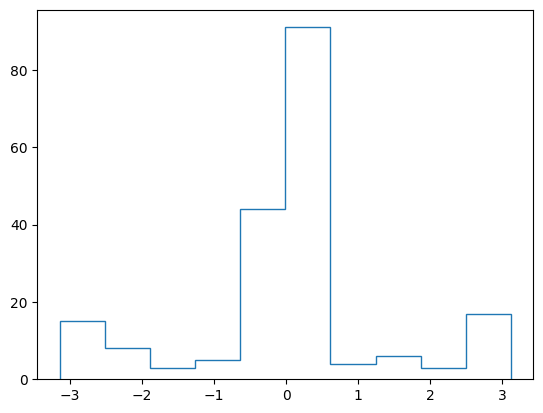

In [31]:
deltaPhiArr = []
arr1 = ak.flatten(signal_masked.gParticlePhi[genMask]).compute()
arr2 = ak.flatten(signal_masked.tauPhi).compute()
for i in range(len(arr1)):
    deltaPhiArr.append(deltaPhi(arr1[i], arr2[i]))



#deltaPhi = np.abs((ak.flatten(signal_masked.gParticlePhi)-ak.flatten(signal_masked.tauPhi)))
plt.hist(deltaPhiArr, histtype="step", label="signak")

In [11]:
deltaR = (np.array(deltaPhiArr)**2+np.array(deltaEta.compute())**2)**0.5
plt.hist(deltaR,histtype='step', label='signal', bins = np.linspace(100, 0,6))
plt.legend()
plt.title("Delta R, Gen and Reco Tau")
plt.xlabel("DeltaR")
plt.ylabel("Fraction of Events")

NameError: name 'deltaPhiArr' is not defined